In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.callbacks import EarlyStopping
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [4]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [5]:
n_classes = len(set(y_train))
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [6]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5)]

In [8]:
batch_size = 128
n_epochs = 200

In [9]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_split=0.2, callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 47s - loss: 0.1880 - acc: 0.9438 - val_loss: 0.0569 - val_acc: 0.9834
Epoch 2/200
48000/48000 [==============================] - 45s - loss: 0.0707 - acc: 0.9789 - val_loss: 0.0423 - val_acc: 0.9873
Epoch 3/200
48000/48000 [==============================] - 45s - loss: 0.0516 - acc: 0.9841 - val_loss: 0.0366 - val_acc: 0.9896
Epoch 4/200
48000/48000 [==============================] - 45s - loss: 0.0403 - acc: 0.9882 - val_loss: 0.0389 - val_acc: 0.9893
Epoch 5/200
48000/48000 [==============================] - 45s - loss: 0.0315 - acc: 0.9901 - val_loss: 0.0378 - val_acc: 0.9908
Epoch 6/200
48000/48000 [==============================] - 45s - loss: 0.0263 - acc: 0.9914 - val_loss: 0.0352 - val_acc: 0.9902
Epoch 7/200
48000/48000 [==============================] - 45s - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0340 - val_acc: 0.9917
Epoch 8/200
48000/48000 [======================

Test loss: 0.0266033417821
Test accuracy: 0.993


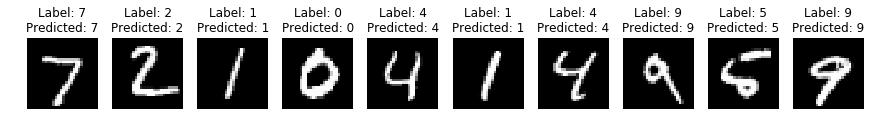

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Extract predictions
preds = model.predict(X_test)

n_examples = 10
plt.figure(figsize=(15, 15))
for i in range(n_examples):
    ax = plt.subplot(2, n_examples, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
    
plt.show()

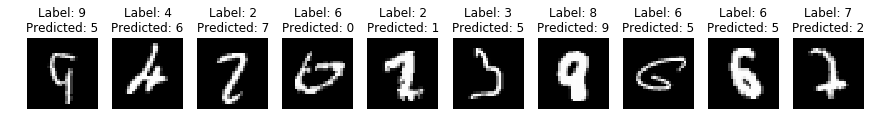

In [11]:
plt.figure(figsize=(15, 15))

j=1
for i in range(len(y_test)):
    if(j>10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:        
        ax = plt.subplot(2, n_examples, j)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        j+=1
plt.show()